In [31]:
import pandas as pd

In [44]:
df = pd.read_csv('MIEM_projects.csv', header=1)

In [47]:
df = df.drop(columns=['Unnamed: 3', '1'])
df = df.dropna(subset=['k'])
df.head()

,k,Название проекта,Тип,Руководитель направления,Руководитель проекта,Консультант/ куратор,Команда проекта,Описание проекта
1,1.0,Изучение транспорта заряженных коллоидных част...,НИР,Буровский Евгений Андреевич,Бараш Лев Юрьевич,NaN,1 вакансия,https://docs.google.com/document/d/1JeYBSshdot...
2,2.0,Изучение конвекции Марангони и транспорта колл...,НИР,Буровский Евгений Андреевич,Бараш Лев Юрьевич,NaN,1 вакансия,https://docs.google.com/document/d/1JeYBSshdot...
3,3.0,Разработка программного комплекса решения эндш...,НИР,Буровский Евгений Андреевич,Бараш Лев Юрьевич,NaN,1 вакансия,https://docs.google.com/document/d/1JeYBSshdot...
4,4.0,Программа объединения точек платежей для проти...,Прогр.,Давыдов Вячеслав Анатольевич,NaN,Воробьев Иван Александрович,3 вакансии,https://docs.google.com/document/d/1LOI74I-abN...
5,5.0,Антифрод (antifraud),Прогр.,Давыдов Вячеслав Анатольевич,Воробьев Иван Александрович,Воробьев Иван Александрович,3 вакансии,https://docs.google.com/document/d/13xkgWRDiSh...


In [49]:
df.shape

(253, 8)

In [55]:
df = df[['k', 'Название проекта', 'Тип']]
df = df.rename(columns={'k': 'number', 'Название проекта': 'title', 'Тип': 'type'})
df.head()

,number,title,type
1,1.0,Изучение транспорта заряженных коллоидных част...,НИР
2,2.0,Изучение конвекции Марангони и транспорта колл...,НИР
3,3.0,Разработка программного комплекса решения эндш...,НИР
4,4.0,Программа объединения точек платежей для проти...,Прогр.
5,5.0,Антифрод (antifraud),Прогр.


In [66]:
df.type.unique()

array(['НИР', 'Прогр.', 'Прогр-аппарат.', 'empty'], dtype=object)

In [67]:
all_categories = df.type.values.tolist()

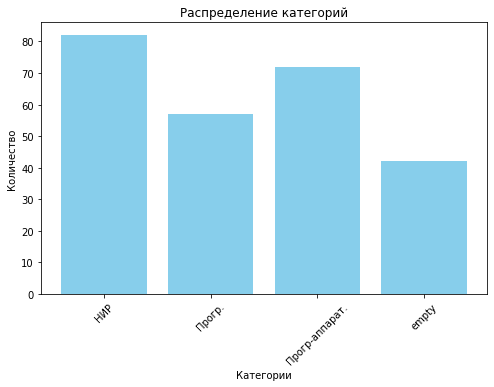

In [70]:
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
c = Counter(all_categories)
plt.xticks(rotation=45)
plt.title('Распределение категорий')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.bar(c.keys(), c.values(), color = "skyblue")
plt.show()

In [71]:
c

Counter({'НИР': 82, 'Прогр.': 57, 'Прогр-аппарат.': 72, 'empty': 42})

In [89]:
all_titles = str()

for i in df.title:
    all_titles += i + ' '

In [90]:
import re

all_titles_clean = re.sub('[^A-Za-zA-Яа-я0-9°]+', ' ', all_titles)
all_titles_clean = all_titles_clean.replace('\n', '').lower()

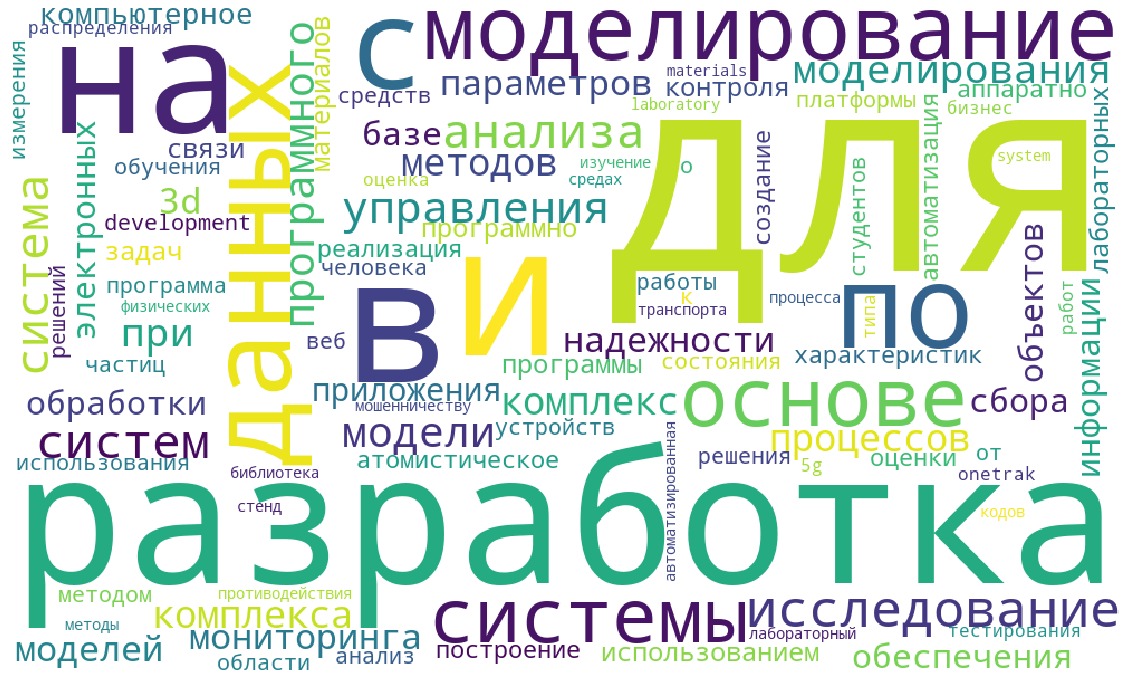

In [91]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width= 1000, height = 600, max_words=100,
                      random_state=1, background_color='white', colormap='viridis_r',
                      collocations=False, stopwords = STOPWORDS).generate(all_titles_clean)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()